# Partie 3 : Modele predictif de Machine Learning

Avant tout,  je vous invite vivement a lire la partie 2 qui traite du nettoyage de la base de données initiale et l'obtention du jeu de données que l'on utilise pour le (les) modele(s) de machine learning.

In [209]:
import pandas as pd
data = pd.read_csv('heart_disease_by_ceo.csv', index_col=0)


## KNN

On commence avec les "import" qui nous permettrons d'utiliser la methode de KNN (K-Nearest-Neighbors)

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

nb_colonnes = len(data.columns)
print("Nombre de colonnes : ", nb_colonnes)

Nombre de colonnes :  19


In [211]:
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,TA_ChestPain,ATA_ChestPain,NAP_ChestPain,ASY_ChestPain,Normal_RestingECG,ST_RestingECG,LVH_RestingECG,Up_ST_Slope,Flat_ST_Slope,Down_ST_Slope,HeartDisease
0,40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0,0
1,49,1,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,1,0,1
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1,0,0,0
3,48,1,138,214,0,108,1,1.5,0,0,0,1,1,0,0,0,1,0,1
4,54,0,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,1,0,0,0,1,0,0,0,1,0,1
914,68,0,144,193,1,141,0,3.4,0,0,0,1,1,0,0,0,1,0,1
915,57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0,1
916,57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0,1


# Division des données

On va ensuite divise notre data frame en deux ensembles afin d'entrainer notre modele.

D'abord assigner toutes les valeurs sauf Heart diseases dans x et Heart diseases dans y.

In [212]:
x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

Puis je vais diviser mes données de la maniere suivante : 

80 % des données pour l'entrainement.
20 % des données pour le test.

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

# Standardisation des variables

Puis je vais standardiser mes variables à l'aide de de StandardScaler()

In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# KNN (k-nearest neighbours)

A l'aide de ces données je vais pouvoir utiliser le modele KNN

In [216]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [217]:
predictions = knn.predict(x_test)

# Prediction et Evaluation du modèle

Je vais ensuite evaluez les performances de mon modeles KNN sur l'ensemble de Test et affichez la matrice de confusion sous forme de tableau puis de graphique et ensuite un rapport de classification.

In [218]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

## Matrice de confusion en tableau

In [219]:
print(confusion_matrix(y_test, predictions))

[[59 13]
 [29 83]]


## Matrice de confusion en graphique

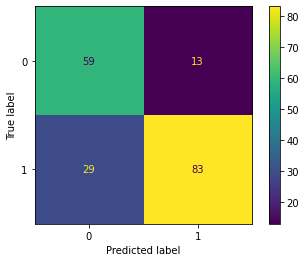

In [220]:
conf = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))
conf.plot()

Rapport de classification : F1-score, Precision, Recall et Support

In [221]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        72
           1       0.86      0.74      0.80       112

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184



# Choix de la valeur de K

On va utiliser la methode "Elbow" pour choisir la valeur de K. Donc nous allons entrainer plusieurs modeles avec des valeurs de K differentes et ensuite afficher les scores pour chaque valeur de K.

Puis on va afficher ces scores sous forme de graphique pour choisir la valeur de K.

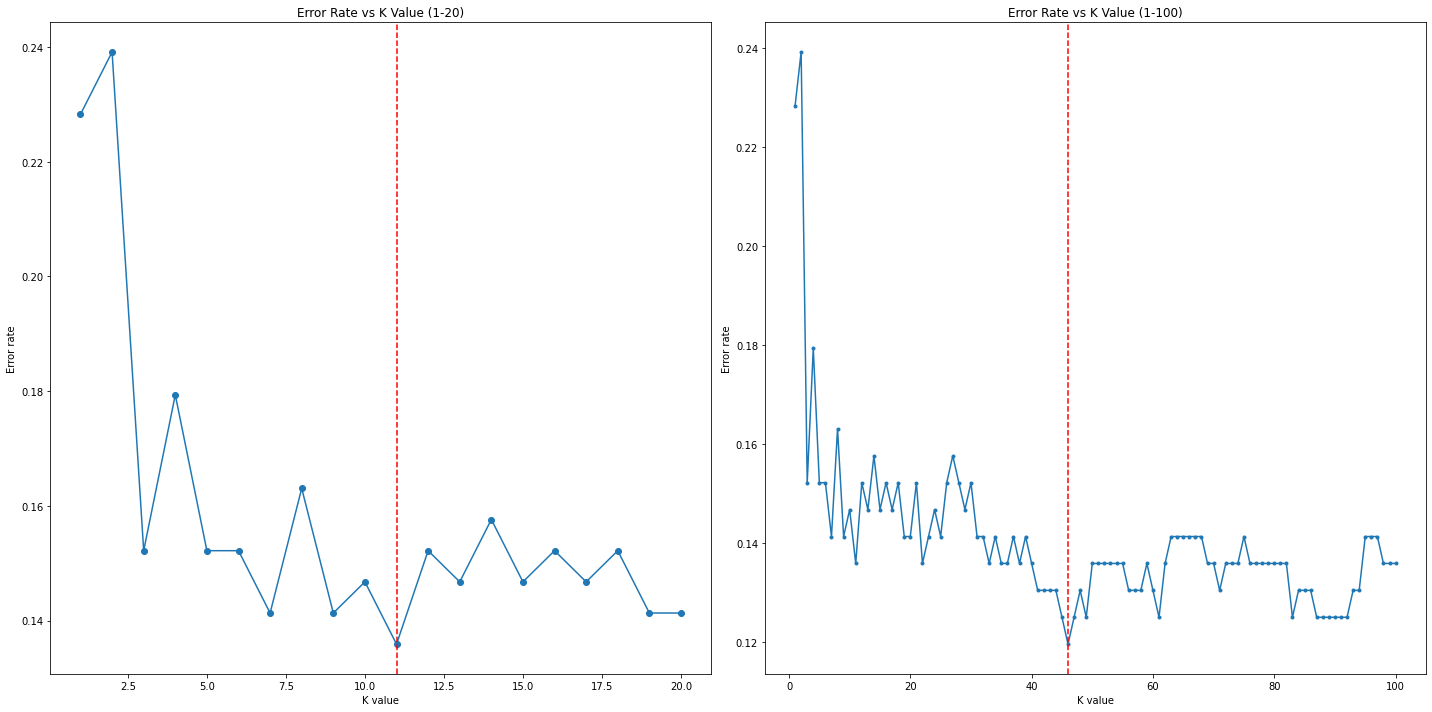

Meilleure valeur (1-20): 11 avec un taux d'erreur: 0.1359
Meilleure valeur (1-100): 46 avec un taux d'erreur: 0.1196


In [222]:
from sklearn.metrics import accuracy_score

# For K values from 1 to 20
erreur_20 = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    test_erreur = 1 - accuracy_score(y_test, pred_i)
    erreur_20.append(test_erreur)

# For K values from 1 to 100
erreur_100 = []
for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    test_erreur = 1 - accuracy_score(y_test, pred_i)
    erreur_100.append(test_erreur)

# Plot results
plt.figure(figsize=(20, 10))

# Plot for K=1 to 20
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), erreur_20, marker='o')
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('Error Rate vs K Value (1-20)')
best_k_20 = np.argmin(erreur_20) + 1
plt.axvline(x=best_k_20, color='r', linestyle='--')

# Plot for K=1 to 100
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), erreur_100, marker='.')
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('Error Rate vs K Value (1-100)')
best_k_100 = np.argmin(erreur_100) + 1
plt.axvline(x=best_k_100, color='r', linestyle='--')

plt.tight_layout()
plt.show()

print(f"Meilleure valeur (1-20): {best_k_20} avec un taux d'erreur: {erreur_20[best_k_20-1]:.4f}")
print(f"Meilleure valeur (1-100): {best_k_100} avec un taux d'erreur: {erreur_100[best_k_100-1]:.4f}")

Le K avec le taux d'erreur le plus bas sera choisi.
on peut choisir K = 46 mais si on veut un K plus petit on peut choisir K = 11

ON va utiliser pour nos tests K= 11 et K = 46.

# Utilisation de la meilleur valeur de K

In [223]:
def tester_patient(patient, k):
    patient = scaler.transform(patient)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction = knn.predict(patient)
    return prediction

def tester_plusieurs_patients(patients, k):
    for patient in patients:
        prediction = tester_patient(patient, k)
        print(f"Patient: {patient} - Prediction: malade ({prediction[0]})" if prediction == 1 else f"Patient: {patient} - Prediction: non malade ({prediction[0]})")
        print("\n")

patient = [[40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0]] #1
patient2 = [[57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0]] #916
patient3 = [[57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0]] #915
patient4 = [[59,0,164,176,1,90,0,1.0,0,0,0,1,0,0,1,0,1,0]] #911
patient5 = [[49,1,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,1,0]] #1

patients = [patient, patient2, patient3, patient4, patient5]


## K = 11

In [224]:
knn = KNeighborsClassifier(n_neighbors=best_k_20)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print("K=11")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

K=11


[[62 10]
 [15 97]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        72
           1       0.91      0.87      0.89       112

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



### Test du modele avec K = 11

In [225]:
tester_plusieurs_patients(patients, best_k_20)

Patient: [[40, 0, 140, 289, 0, 172, 0, 0.0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]] - Prediction: non malade (0)




Patient: [[57, 1, 130, 236, 0, 174, 0, 0.0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]] - Prediction: non malade (0)


Patient: [[57, 0, 130, 131, 0, 115, 1, 1.2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]] - Prediction: malade (1)


Patient: [[59, 0, 164, 176, 1, 90, 0, 1.0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]] - Prediction: malade (1)


Patient: [[49, 1, 160, 180, 0, 156, 0, 1.0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]] - Prediction: non malade (0)




## K = 46

In [226]:
knn = KNeighborsClassifier(n_neighbors=46)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print("K=46")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))



K=46


[[65  7]
 [15 97]]


              precision    recall  f1-score   support

           0       0.81      0.90      0.86        72
           1       0.93      0.87      0.90       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184



### Test du modele avec K = 46

In [227]:
tester_plusieurs_patients(patients, best_k_100)


Patient: [[40, 0, 140, 289, 0, 172, 0, 0.0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]] - Prediction: non malade (0)




Patient: [[57, 1, 130, 236, 0, 174, 0, 0.0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]] - Prediction: non malade (0)


Patient: [[57, 0, 130, 131, 0, 115, 1, 1.2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]] - Prediction: malade (1)


Patient: [[59, 0, 164, 176, 1, 90, 0, 1.0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]] - Prediction: malade (1)


Patient: [[49, 1, 160, 180, 0, 156, 0, 1.0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]] - Prediction: non malade (0)




## Remarque :

Patient 915 est un faux negatif. Il est malade mais le modele le considere comme sain.

# Conclusion